In [1]:
import pandas as pd

In [2]:
base = pd.read_excel('/content/sample_data/dados_asset_bills.xlsx', sheet_name = 'Planilha1')

# IA - MODELO 1


In [16]:
base

,id,due_date,nfe_number,nfe_series,kind,state,payer_id,endorser_original_id,new_due_date,participant_id,...,payment_place,update_reason_kind,finished_at,NOME_PARTICIPANTE,NOME_EMPRESA,NOME_PAGADOR,TIPO_PAGADOR,NOME_ENDOSSER,TIPO_ENDORSOR,PARTICIPANTE_TERCEIRO
0,9d1810e2-ac3e-4491-b227-f2791d6fd075,2033-08-05,3.212132e+08,1.234000e+03,goods,active,d4a0d331-31ba-4cc5-836c-b2973b6991a8,bb93b3dc-7d5c-411c-9505-4162cc3770b7,2033-08-05,a11591f2-4cc7-4ff3-bb27-ad1e25361178,...,São Paulo,NaN,NaT,Jorge Cardoso,"Ramalho, Macieira e Caldeira",RENOVEL VEICULOS LTDA RENOVEL,AssetPayer,Renault do Brasil S/A,AssetEndorser,NaN
1,05599b7b-383d-4252-b545-fc1cb66060bf,2033-08-05,1.364415e+09,1.364415e+09,goods,active,19c06e7a-d228-49da-aa7f-dee8e27d44fe,6bd4db42-d810-4aba-a9a7-9bc3fea86de4,2033-08-05,a11591f2-4cc7-4ff3-bb27-ad1e25361178,...,São Paulo,NaN,NaT,Jorge Cardoso,"Ramalho, Macieira e Caldeira",NELSON FLORISBAL,AssetPayer,KABUM COMERCIO ELETRONICO S.A,AssetEndorser,NaN
2,a96c56d3-fbb6-4fc6-b847-fb50c7b24b4b,2033-08-05,1.364415e+09,1.364415e+09,goods,active,824db039-26dc-4fef-af2b-2f6506e9c4a6,0e129a7f-a183-428b-9621-8aaa57a60c8d,2033-08-05,a11591f2-4cc7-4ff3-bb27-ad1e25361178,...,São Paulo,NaN,NaT,Jorge Cardoso,"Ramalho, Macieira e Caldeira",NELSON FLORISBAL,AssetPayer,KABUM COMERCIO ELETRONICO S.A,AssetEndorser,NaN
3,6497686d-b35c-4362-afc6-fa6524f0440f,2033-08-05,1.488456e+09,1.488456e+09,goods,active,71704382-bbbd-4fa6-9e6c-6d3721d26c6b,8ffac260-119c-4117-b947-82cb4871d16d,2033-08-05,a11591f2-4cc7-4ff3-bb27-ad1e25361178,...,São Paulo,NaN,NaT,Jorge Cardoso,"Ramalho, Macieira e Caldeira",NELSON FLORISBAL,AssetPayer,KABUM COMERCIO ELETRONICO S.A,AssetEndorser,NaN
4,7e43d771-08ad-42d4-ad99-b1b2a0b0ddbf,2033-08-05,1.488456e+09,1.488456e+09,goods,active,bed52bbd-43de-4c73-8e21-1328496b2ba2,c51d96cb-5bf4-4a4d-8d37-ed6fa5c82ce5,2033-08-05,a11591f2-4cc7-4ff3-bb27-ad1e25361178,...,São Paulo,NaN,NaT,Jorge Cardoso,"Ramalho, Macieira e Caldeira",NELSON FLORISBAL,AssetPayer,KABUM COMERCIO ELETRONICO S.A,AssetEndorser,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181234,6077fb99-05c6-410d-8526-508ce2d1857b,2024-05-24,9.672000e+03,2.000000e+00,goods,finished,46c3612f-d324-42de-88a6-3a1070580c65,d499797a-3f87-4609-aa7d-1927906bf033,2024-05-24,36a4e2c1-cd16-4922-860a-280d3ffc8591,...,RS,NaN,2024-04-30,Baru Griffin Fundo de Investimento em Direitos...,Baru Griffin Fundo de Investimento em Direitos...,RAIA DROGASIL S/A,AssetPayer,STEM PHARMACEUTICAL SUPLEMENTOS ALIMENTARES LTDA,AssetEndorser,NaN
181235,a16c328f-ebb1-410b-a985-0ccfc4b79041,2024-07-05,2.310410e+05,2.000000e+00,goods,finished,1da1095d-b5de-453f-9591-5350097a71d4,0b525707-6e65-4c2a-97b3-ce3e0a3999d4,2024-07-05,36a4e2c1-cd16-4922-860a-280d3ffc8591,...,RS,NaN,2024-04-30,Baru Griffin Fundo de Investimento em Direitos...,Baru Griffin Fundo de Investimento em Direitos...,CELSO JAIR JASKIV,AssetPayer,VECTOR INDUSTRIA DE PRODUTOS METALURGICOS LTDA,AssetEndorser,NaN
181236,db77b18f-4f7b-43dc-bb6d-57171bbe070e,2024-05-07,1.949100e+04,2.000000e+00,goods,finished,82a78a60-317e-4dab-a37f-b02a26365a8f,ecb7120b-0adb-426c-9aa7-c75aaa091310,2024-05-07,70334247-d44f-4daa-ae45-044ebb3ddb4d,...,MG,NaN,2024-05-03,CAPITAL FINANÇAS FIDC MULTISSETORIAL,CAPITAL FINANÇAS FIDC MULTISSETORIAL,Lokcap Construcoes e Locacoes Eirel,AssetPayer,SUPER BULL IMPORTACAO E COMERCIO DE EQUIPAMENT...,AssetEndorser,NaN
181237,537a0f2c-3c64-418e-8ba1-152242b31f3c,2024-05-07,1.949400e+04,2.000000e+00,goods,finished,441adf61-1b1a-4237-8133-95adf42c10b6,f027efa4-6519-49ae-8007-bf8e3766a1ac,2024-05-07,70334247-d44f-4daa-ae45-044ebb3ddb4d,...,MG,NaN,2024-05-03,CAPITAL FINANÇAS FIDC MULTISSETORIAL,CAPITAL FINANÇAS FIDC MULTISSETORIAL,VPS Locacoes Ltda,AssetPayer,SUPER BULL IMPORTACAO E COMERCIO DE EQUIPAMENT...,AssetEndorser,NaN


In [17]:
base_teste = base

In [ ]:
#base_teste['AGING_NEGOCIACAO'] = base_teste['new_due_date'] - base_teste['due_date']

In [18]:
base_teste = base_teste.groupby(['NOME_ENDOSSER', 'state']).size().reset_index(name='total_state')

In [19]:
base_teste = base_teste.pivot(values = 'total_state', index = 'NOME_ENDOSSER', columns = 'state').reset_index().fillna(0)

In [20]:
base_teste['total'] = base_teste['active'] + base_teste['canceled'] + base_teste['finished']

In [21]:
# Score de Classificação de Duplicatas Finalizadas
# D- Primeira faixa do score: 1-5 duplicatas finalizadas.
# C- Segunda faixa do score: 6-18 duplicatas finalizadas.
# Terceira faixa do score: 19-30 duplicatas finalizadas.
# Quarta faixa do score: acima de 30 duplicatas finalizadas.
attribute = 'class_finished'
category = [1, 2, 3, 4]
# bin = base_teste.copy()
base_teste[attribute]=pd.cut(x=base_teste['finished'], bins=[-1,5,18,30,200],labels=category)
base_teste


state,NOME_ENDOSSER,active,canceled,finished,total,class_finished
0,2001-08-01 00:00:00,1.0,0.0,0.0,1.0,1
1,LEAO NORDESTE INDUSTRIA E COMERCIO DE PLASTIC...,50.0,0.0,0.0,50.0,1
2,RAIADROGASIL S/A,7.0,2.0,2.0,11.0,1
3,Shopping São Paulo,1.0,0.0,0.0,1.0,1
4,027 SMP - IND. COMERCIO MOVEIS LTDA,12.0,0.0,0.0,12.0,1
...,...,...,...,...,...,...
604,testeFa,0.0,0.0,1.0,1.0,1
605,testeFabricio,2.0,0.0,0.0,2.0,1
606,testeFalha500,30.0,0.0,0.0,30.0,1
607,ultragaz,1.0,0.0,0.0,1.0,1


In [22]:
base_teste['perc_finished'] = base_teste['finished'] / base_teste['total']

In [23]:
base_teste

state,NOME_ENDOSSER,active,canceled,finished,total,class_finished,perc_finished
0,2001-08-01 00:00:00,1.0,0.0,0.0,1.0,1,0.000000
1,LEAO NORDESTE INDUSTRIA E COMERCIO DE PLASTIC...,50.0,0.0,0.0,50.0,1,0.000000
2,RAIADROGASIL S/A,7.0,2.0,2.0,11.0,1,0.181818
3,Shopping São Paulo,1.0,0.0,0.0,1.0,1,0.000000
4,027 SMP - IND. COMERCIO MOVEIS LTDA,12.0,0.0,0.0,12.0,1,0.000000
...,...,...,...,...,...,...,...
604,testeFa,0.0,0.0,1.0,1.0,1,1.000000
605,testeFabricio,2.0,0.0,0.0,2.0,1,0.000000
606,testeFalha500,30.0,0.0,0.0,30.0,1,0.000000
607,ultragaz,1.0,0.0,0.0,1.0,1,0.000000


In [24]:
# Faixa 1: <= 12%
# Faixa 2: > 12% e <= 37%
# Faixa 3: > 37% e <= 60%
# Faixa 4: > 60%
attribute = 'class_perc_finished'
category = [1, 2, 3, 4]
base_teste[attribute]=pd.cut(x=base_teste['perc_finished'], bins=[-0.99,0.12,0.37,0.60,1],labels=category)

In [25]:
base_teste['perc_canceled'] = base_teste['canceled']/base_teste['total']

In [26]:
base_teste

state,NOME_ENDOSSER,active,canceled,finished,total,class_finished,perc_finished,class_perc_finished,perc_canceled
0,2001-08-01 00:00:00,1.0,0.0,0.0,1.0,1,0.000000,1,0.000000
1,LEAO NORDESTE INDUSTRIA E COMERCIO DE PLASTIC...,50.0,0.0,0.0,50.0,1,0.000000,1,0.000000
2,RAIADROGASIL S/A,7.0,2.0,2.0,11.0,1,0.181818,2,0.181818
3,Shopping São Paulo,1.0,0.0,0.0,1.0,1,0.000000,1,0.000000
4,027 SMP - IND. COMERCIO MOVEIS LTDA,12.0,0.0,0.0,12.0,1,0.000000,1,0.000000
...,...,...,...,...,...,...,...,...,...
604,testeFa,0.0,0.0,1.0,1.0,1,1.000000,4,0.000000
605,testeFabricio,2.0,0.0,0.0,2.0,1,0.000000,1,0.000000
606,testeFalha500,30.0,0.0,0.0,30.0,1,0.000000,1,0.000000
607,ultragaz,1.0,0.0,0.0,1.0,1,0.000000,1,0.000000


In [27]:
attribute = 'class_perc_canceled'
category = [4, 3, 2, 1]
base_teste[attribute]=pd.cut(x=base_teste['perc_canceled'], bins=[-.1,0.22,0.5,0.8,1],labels=category)

In [28]:
# Score de total de duplicatas

# D <= 40 duplicatas
# C <= 100 duplicatas
# B <= 200 duplicatas
# A > 200
attribute = 'class_total'
category = [1,2,3,4]
base_teste[attribute]=pd.cut(x=base_teste['total'], bins=[-1,40,100,200,1000000],labels=category)

In [29]:
base_teste['perc_active'] = base_teste['active'] / base_teste['total']

In [30]:


# Força a tipagem para inteiro das colunas especificadas
base_teste['class_finished'] = base_teste['class_finished'].astype(int)
base_teste['class_perc_finished'] = base_teste['class_perc_finished'].astype(int)
base_teste['class_perc_canceled'] = base_teste['class_perc_canceled'].astype(int)
base_teste['class_total'] = base_teste['class_total'].astype(int)
# prompt: Com base nas seguintes colunas, gere uma nova coluna da média dessas e arredonde para um valor inteiro: 'class_finished', 'class_perc_finished', 'class_perc_canceled', 'class_total' e force a tipagem para inteiro das colunas

# Calcula a média das colunas especificadas e arredonda para um valor inteiro
base_teste['media_classificacao'] = (base_teste['class_finished'] + base_teste['class_perc_finished'] + base_teste['class_perc_canceled'] + base_teste['class_total']) / 4
base_teste['media_classificacao'] = base_teste['media_classificacao'].round(0).astype(int)

In [ ]:
base_teste[base_teste['media_classificacao'] == 4]


state,NOME_ENDOSSER,active,canceled,finished,total,class_finished,perc_finished,class_perc_finished,perc_canceled,class_perc_canceled,class_total,media_classificacao
255,HERA METAIS IND COM PERF DE ALUM LTDA,471.0,0.0,68.0,539.0,4,0.12616,2,0.0,4,4,4


In [ ]:
# Utilizando apenas alguns atributos
X = base_teste[['active',	'canceled',	'finished',	'total',	'class_finished',	'perc_finished',	'class_perc_finished',	'perc_canceled',	'class_perc_canceled',	'class_total']]
# Queremos fazer os diagnósticos
y = base_teste['media_classificacao']

In [ ]:
# Retira 20% para testar
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Treina com 80%
from sklearn.tree import DecisionTreeClassifier

# Instancia um classificador tipo árvore de decisão com profundidade máxima 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Treina o modelo
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

Acurácia: 0.98
Matriz de Confusão


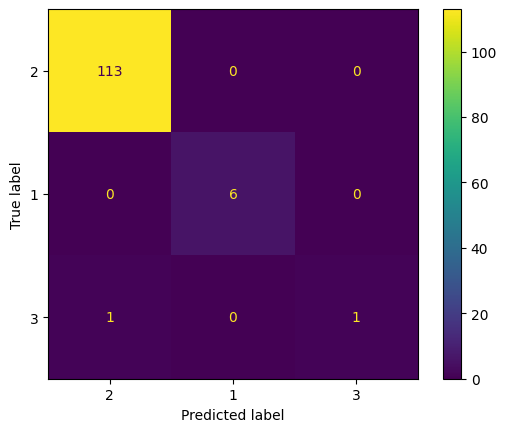

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = dt.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
disp.plot()

In [ ]:
len(base_teste[base_teste['media_classificacao'] == 1])


28

# IA - MODELO 2

In [130]:
model_base = base[['state', 'due_date', 'new_due_date', 'kind', 'payment_place', 'NOME_ENDOSSER']]

In [131]:
model_base = model_base[model_base['state'] != 'active']

In [132]:
model_base['state'] = model_base['state'].map({'finished':1,'canceled':0})

In [133]:
model_base

,state,due_date,new_due_date,kind,payment_place,NOME_ENDOSSER
109795,0,2033-08-05,2033-08-05,goods,São Paulo,KABUM COMERCIO ELETRONICO S.A
109796,0,2033-08-05,2033-08-05,goods,São Paulo,KABUM COMERCIO ELETRONICO S.A
109797,0,2033-08-05,2033-08-05,goods,São Paulo,KABUM COMERCIO ELETRONICO S.A
109798,0,2033-08-05,2033-08-05,goods,São Paulo,KABUM COMERCIO ELETRONICO S.A
109799,0,2033-08-05,2033-08-05,goods,São Paulo,KABUM COMERCIO ELETRONICO S.A
...,...,...,...,...,...,...
181234,1,2024-05-24,2024-05-24,goods,RS,STEM PHARMACEUTICAL SUPLEMENTOS ALIMENTARES LTDA
181235,1,2024-07-05,2024-07-05,goods,RS,VECTOR INDUSTRIA DE PRODUTOS METALURGICOS LTDA
181236,1,2024-05-07,2024-05-07,goods,MG,SUPER BULL IMPORTACAO E COMERCIO DE EQUIPAMENT...
181237,1,2024-05-07,2024-05-07,goods,MG,SUPER BULL IMPORTACAO E COMERCIO DE EQUIPAMENT...


In [134]:
# split dataset in features and target variable
feature_cols = ['due_date', 'new_due_date', 'kind', 'payment_place', 'NOME_ENDOSSER']
X = model_base[feature_cols] # Features
y = model_base.state # Target variable


In [136]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [139]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

TypeError: float() argument must be a string or a real number, not 'Timestamp'